Import and load data 

In [27]:
import keras
import numpy as np
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Number of training samples:",len(train_images))
print("Number of testing samples:", len(test_images))
print("Possible labels:", np.unique(train_labels))

Number of training samples: 60000
Number of testing samples: 10000
Possible labels: [0 1 2 3 4 5 6 7 8 9]


Plot sample image 

Sample image size: (28, 28)
Sample image label: 7


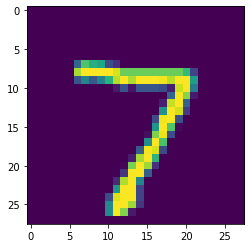

In [28]:
%matplotlib inline 
from matplotlib import pyplot as plt

print("Sample image size:", test_images[0].shape)
print("Sample image label:", test_labels[0])
plt.imshow(test_images[0], interpolation='nearest')
plt.show()

Prepare neural network

In [29]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Adjust data

In [30]:
from keras.utils import to_categorical

train_images = np.reshape(train_images, (60000, 28 * 28))
train_images = train_images.astype('float32')

test_images = np.reshape(test_images, (10000, 28 * 28))
test_images = test_images.astype('float32')
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Fit the model

In [31]:
network.fit(train_images, train_labels, batch_size=128, epochs=5)



Epoch 1/5
60000/60000 [==============================] - 2s 25us/step - loss: 6.3091 - accuracy: 0.8968
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.7207 - accuracy: 0.9536
Epoch 3/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.5156 - accuracy: 0.9659
Epoch 4/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.4100 - accuracy: 0.9725
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.3384 - accuracy: 0.9758


Network evaluation

In [32]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


10000/10000 [==============================] - 0s 30us/step
test_acc: 0.9635999798774719
